# MSRE CAD - Criticality test 

In this notebook the MSRE criticality test is simulated using a CAD design version developed by [Copenhagen Atomics](https://www.copenhaagenatomics.com) using the CAE tool OnShape and made available for export here: [onshape msre model]((https://cad.onshape.com/documents/4f04f63bfd4138a61a54b3f8/v/b8c29a0cedda86dfc6948111/)).  


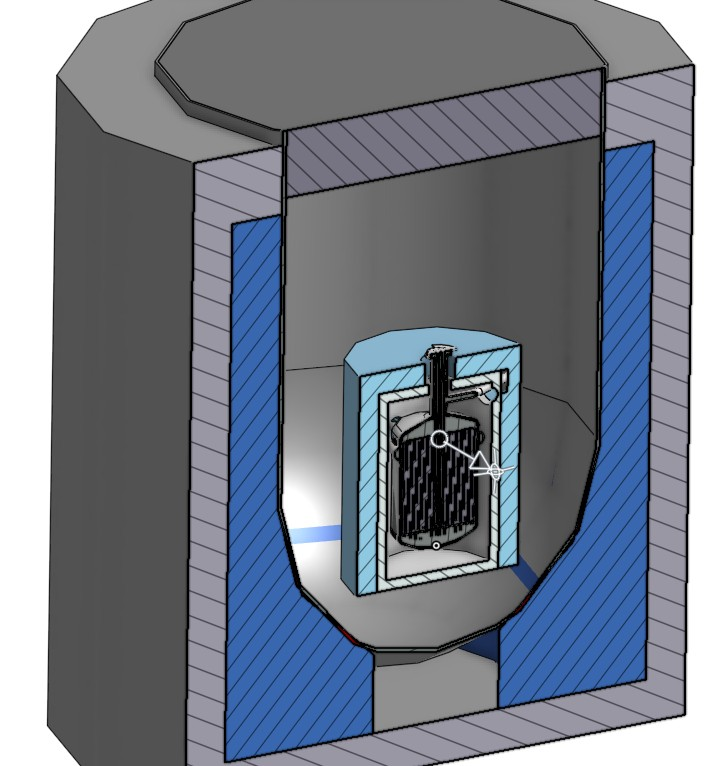

In [28]:
from IPython.display import Image
Image("./images/msre_assembly.jpg", width=400)

Fig. 1: Section view of entire assembly

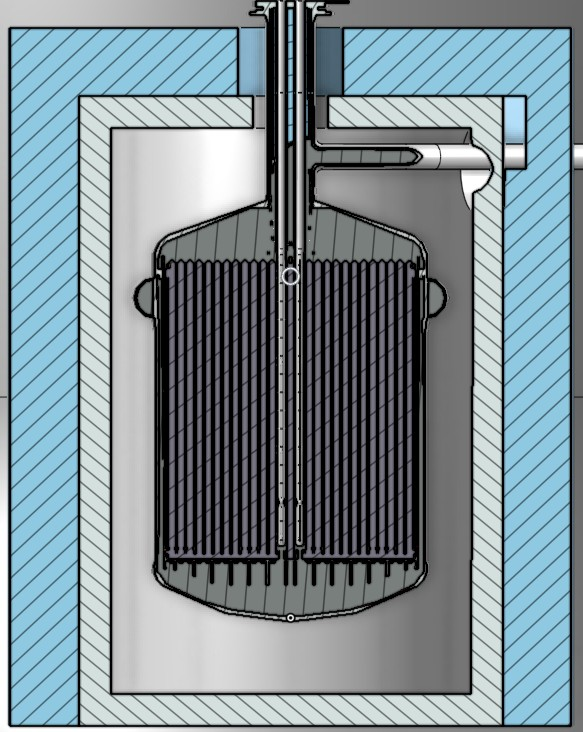

In [29]:
Image("./images/msre_core.jpg", width=400)

Fig. 2: Section view of reactor vessel and thermal shielding

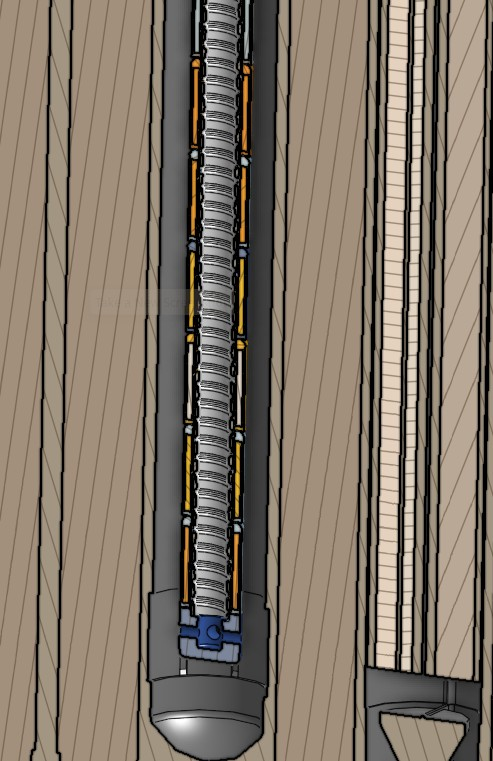

In [30]:
Image("./images/control_rod.jpg", width=400)

Fig. 3: Section view of control rod bottom end

Teh CAD geometry has been surface meshed and converted into h5m files, readable by OpenMC, using the open-source meshing tool 
[CAD-to-OpenMC](https://github.com/openmsr/CAD_to_OpenMC). 
Two step files have been exported from OnShape:
- the entire vessel and shielding
- one of the the control rod 

**Note**: only one control rod has been meshed. The other two can be created directly within the OpenMC environment, as DAGMC universe duplicates of the imported one.
The reason to have a separate export of the control rods is to paramterize their position within Openmc directly.



In [31]:
%matplotlib inline

import openmc
import numpy as np
from math import log10
import matplotlib.pyplot as plt
import os 

os.system('rm *.xml *.h5')

0

Materials definition during the first criticality test comes from the MSRE benchmark evaluation [Fratoni et al](https://www.osti.gov/servlets/purl/1617123) and available in the International Reactor Physics Experiment Evaulation Project (IRPhEP) handbook. 

In [32]:
salt_temp = 648.9
salt = openmc.Material(name="salt", temperature = salt_temp + 273.15)
salt.add_nuclide('Li6', 0.0000131541127279649)
salt.add_nuclide('Li7', 0.263082254559299)
salt.add_nuclide('Be9', 0.118688703357854)
salt.add_nuclide('Zr90', 0.0105474637491834)
salt.add_nuclide('Zr91', 0.00230014661352455)
salt.add_nuclide('Zr92', 0.00351582124972781)
salt.add_nuclide('Zr94', 0.00356297220526352)
salt.add_nuclide('Zr96', 0.000574011632608622)
salt.add_nuclide('Hf174', 0.000000000838247756705461)
salt.add_nuclide('Hf176', 0.000000027557395001692)
salt.add_nuclide('Hf177', 0.0000000974463017170099)
salt.add_nuclide('Hf178', 0.000000142921242518281)
salt.add_nuclide('Hf179', 0.0000000713558402895524)
salt.add_nuclide('Hf180', 0.000000183785820657672)
salt.add_nuclide('U234', 0.000010347565467384)
salt.add_nuclide('U235', 0.00101016470221956)
salt.add_nuclide('U236', 0.00000422977321829143)
salt.add_nuclide('U238', 0.00216927473057667)
salt.add_nuclide('Fe54', 0.00000285638012142825)
salt.add_nuclide('Fe56', 0.0000448390593090724)
salt.add_nuclide('Fe57', 0.00000103552942297801)
salt.add_nuclide('Fe58', 0.000000137809956243416)
salt.add_nuclide('Cr50', 0.00000212334843928242)
salt.add_nuclide('Cr52', 0.000040946661076878)
salt.add_nuclide('Cr53', 0.00000464302267471169)
salt.add_nuclide('Cr54', 0.00000115574661884993)
salt.add_nuclide('Ni58', 0.00000586242358522768)
salt.add_nuclide('Ni60', 0.00000225819506936691)
salt.add_nuclide('Ni61', 0.0000000981621760803009)
salt.add_nuclide('Ni62', 0.00000031298397136929)
salt.add_nuclide('Ni64', 0.0000000797077903148755)
salt.add_nuclide('O16', 0.0000514608160260434)
salt.add_nuclide('O17', 0.0000000189357310970321)
salt.add_nuclide('O18', 0.0000000964845153990466)
salt.add_nuclide('F19', 0.594363006576997)
salt.set_density('g/cm3',2.3278)

#moderator blocks170
graphite = openmc.Material(name='graphite',temperature= salt_temp + 273.15)
graphite.set_density('g/cm3',1.8492)
graphite.add_element('C',0.999992212250888) #endfb71 does not have C12 cross sections
graphite.add_nuclide('B10', 1.76873036539477E-07)
graphite.add_nuclide('B11', 7.1193229306592E-07)
graphite.add_nuclide('V51', 2.12200224802724E-06)
graphite.add_nuclide('S32', 1.77900760271203E-06)
graphite.add_nuclide('S33', 1.40462754188233E-08)
graphite.add_nuclide('S34', 7.95955607066653E-08)
graphite.add_nuclide('S36', 1.87283672250977E-10)
graphite.add_nuclide('O16', 1.85674385782835E-06)
graphite.add_nuclide('O17', 6.81675170610618E-10)
graphite.add_nuclide('Si28', 5.31911333979174E-07)
graphite.add_nuclide('Si29', 2.70215087309286E-08)
graphite.add_nuclide('Si30', 1.78336189959512E-08)
graphite.add_nuclide('Al27', 4.0117589478321E-07)
graphite.add_nuclide('Fe54', 2.31047953307142E-09)
graphite.add_nuclide('Fe56', 3.62695875239409E-08)
graphite.add_nuclide('Fe57', 8.37622947917593E-10)
graphite.add_nuclide('Fe58', 1.11472237523719E-10)
graphite.add_nuclide('Ti46', 1.12809907219147E-09)
graphite.add_nuclide('Ti47', 1.01734025419449E-09)
graphite.add_nuclide('Ti48', 1.008041983054E-08)
graphite.add_nuclide('Ti49', 7.39759512794646E-10)
graphite.add_nuclide('Ti50', 7.08309478054763E-10)
graphite.add_nuclide('Mg24', 8.53578076978748E-09)
graphite.add_nuclide('Mg25', 1.0806153652092E-09)
graphite.add_nuclide('Mg26', 1.18975751709533E-09)
graphite.add_nuclide('Ca40', 4.58305905846326E-09)
graphite.add_nuclide('Ca42', 3.05880815220158E-11)
graphite.add_nuclide('Ca43', 6.38236631448551E-12)
graphite.add_nuclide('Ca44', 9.86193787556798E-11)
graphite.add_nuclide('Ca48', 8.8407592652503E-12)
graphite.add_s_alpha_beta('c_Graphite')

#inor-8
inor = openmc.Material(name='inor-8',temperature= salt_temp + 273.15)
inor.set_density('g/cm3',8.7745)
inor.add_element('Ni',(66+71)/2,'wo')
inor.add_element('Mo',(15+18)/2,'wo')
inor.add_element('Cr',(6+8)/2,'wo')
inor.add_element('Fe',5,'wo')
inor.add_element('C',(0.04+0.08)/2,'wo')
inor.add_element('Al',0.25,'wo')
inor.add_element('Ti',0.25,'wo')
inor.add_element('S',0.02,'wo')
inor.add_element('Mn',1.0,'wo')
inor.add_element('Si',1.0,'wo')
inor.add_element('Cu',0.35,'wo')
inor.add_element('B',0.010,'wo')
inor.add_element('W',0.5,'wo')
inor.add_element('P',0.015,'wo')
inor.add_element('Co',0.2,'wo')

#helium
helium = openmc.Material(name='helium')
helium.add_element('He',1.0)
helium.set_density('g/cm3',1.03*(10**-4))

#Control rods inconel clad
trace = 0.01
inconel = openmc.Material(name='inconel-600', temperature = 65.6 + 273.15)
inconel.add_element('Ni',78.5,percent_type='wo')
inconel.add_element('Cr',14.0,percent_type='wo')
inconel.add_element('Fe',6.5,percent_type='wo')
inconel.add_element('Mn',0.25,percent_type='wo')
inconel.add_element('Si',0.25,percent_type='wo')
inconel.add_element('Cu',0.2,percent_type='wo')
inconel.add_element('Co',0.2,percent_type='wo')
inconel.add_element('Al',0.2,percent_type='wo')
inconel.add_element('Ti',0.2,percent_type='wo')
inconel.add_element('Ta',0.5,percent_type='wo')
inconel.add_element('W',0.5,percent_type='wo')
inconel.add_element('Zn',0.2,percent_type='wo')
inconel.add_element('Zr',0.1,percent_type='wo')
inconel.add_element('C',trace,percent_type='wo')
inconel.add_element('Mo',trace,percent_type='wo')
inconel.add_element('Ag',trace,percent_type='wo')
inconel.add_element('B',trace,percent_type='wo')
inconel.add_element('Ba',trace,percent_type='wo')
inconel.add_element('Be',trace,percent_type='wo')
inconel.add_element('Ca',trace,percent_type='wo')
inconel.add_element('Cd',trace,percent_type='wo')
inconel.add_element('V',trace,percent_type='wo')
inconel.add_element('Sn',trace,percent_type='wo')
inconel.add_element('Mg',trace,percent_type='wo')
inconel.set_density('g/cm3',8.5)

#Control rods bushing posion material
Gd2O3 = openmc.Material()
Gd2O3.add_element('Gd',2)
Gd2O3.add_element('O',3)
Gd2O3.set_density('g/cm3',7.41)
Al2O3 = openmc.Material()
Al2O3.add_element('Al',2)
Al2O3.add_element('O',3)
Al2O3.set_density('g/cm3',3.95)
bush = openmc.Material.mix_materials([Gd2O3,Al2O3],[0.7,0.3],'wo')
bush.name='gd2o3-al2o3'
bush.temperature = 65.6 +273.15

#Concrete block
concrete = openmc.Material(name='concrete')
concrete.add_element('H',0.005,'wo')
concrete.add_element('O',0.496,'wo')
concrete.add_element('Si',0.314,'wo')
concrete.add_element('Ca',0.083,'wo')
concrete.add_element('Na',0.017,'wo')
concrete.add_element('Mn',0.002,'wo')
concrete.add_element('Al',0.046,'wo')
concrete.add_element('S',0.001,'wo')
concrete.add_element('K',0.019,'wo')
concrete.add_element('Fe',0.012,'wo')
concrete.set_density('g/cm3',2.35)

#Thermal shielding as water and SS305 (50-50)
water = openmc.Material()
water.add_element('H',2)
water.add_element('O',1)
water.set_density('g/cm3',0.997)

#stainless steel 304
ss304 =  openmc.Material()
ss304.add_element('C',0.08,'wo')
ss304.add_element('Mn',2,'wo')
ss304.add_element('P',0.045,'wo')
ss304.add_element('S',0.03,'wo')
ss304.add_element('Si',0.75,'wo')
ss304.add_element('Cr',19,'wo')
ss304.add_element('Ni',10,'wo')
ss304.add_element('N',0.1,'wo')
ss304.add_element('Fe',67.995, 'wo')
ss304.set_density('g/cm3',7.93)
shield = openmc.Material.mix_materials([water,ss304],[0.5,0.5],'vo')
shield.temperature = 32.2 + 273.15
shield.name='steelwater'

# "Careytemp 1600" by Philip Carey Manufacturing Compamy (Cincinnati)
# http://moltensalt.org/references/static/downloads/pdf/ORNL-TM-0728.pdf
insulation=openmc.Material(name='insulation')
insulation.add_element('Si',1)
insulation.add_element('O',2)
insulation.set_density('g/cm3',0.16) #https://www.osti.gov/servlets/purl/1411211

# sand water, not sure about this material
sandwater=openmc.Material(name='watersand')
sandwater.add_element('Fe',3)
sandwater.add_element('O',4)
sandwater.set_density('g/cm3',6)

#Vessel anular steel
steel = openmc.Material(name='steel')
steel.add_element('Fe',1)
steel.set_density('g/cm3',7.85)

mats = openmc.Materials([salt, graphite, inor, helium, inconel, shield, concrete,
                         steel, sandwater, insulation, bush])

Let's now import the h5m mesh files: 
- MSRE vessel + shielding 
- Control rod 

We will create two `DAGMC` universes that will be used to fill the core and control rod cells, respectively. \
As previously mentioned, we will create the other two control rods as conveniently translated replica of the first one. \
All three control rods are now objects and the `translation` attribute value can be set accordinly using the `setattr()` function. 

All three control rods at set as fully withdrawn (56 inches from bottom end)

In [33]:
# CAD h5m files
core_h5m = 'msre_full.h5m'
control_rod_h5m = 'msre_control_rod.h5m'

#Geometry
core = openmc.DAGMCUniverse(filename = core_h5m, auto_geom_ids = True,
                            universe_id = 1)
control_rod = openmc.DAGMCUniverse(filename = control_rod_h5m,
                            auto_geom_ids = True, universe_id=2)
core_region = core.bounding_region()
cr_region = control_rod.bounding_region(boundary_type = 'transmission')

_offset_xy = 10.163255 #cm, _offset_xy between cr1, cr2 and cr3 (from Onshape model)
_lower_rod = 61.728 # distance to lower limit (from OnShape model)
_upper_rod = 51 * 2.54 # escursion to upper rod limit (from ORNL)
start_rod = 56 * 2.54 # rod iniitial position (user input)

# Create control rod regions w
cr1_region = cr_region.translate([_offset_xy/2, _offset_xy/2, _lower_rod + _upper_rod])
cr2_region = cr_region.translate([_offset_xy/2, -_offset_xy/2, _lower_rod + _upper_rod])
cr3_region = cr_region.translate([-_offset_xy/2, -_offset_xy/2, _lower_rod + _upper_rod])

# Extend control rod region1 to include downloads translations
cr1_region = cr1_region | cr1_region.translate([0, 0, -_upper_rod])

#Define cells
core_cell = openmc.Cell(region=~(cr1_region | cr2_region | cr3_region) & core_region ,
                        fill=core)

cr1_cell = openmc.Cell(name='CR1', region=cr1_region, fill=control_rod)
cr2_cell = openmc.Cell(name='CR2', region=cr2_region, fill=control_rod)
cr3_cell = openmc.Cell(name='CR3', region=cr3_region, fill=control_rod)

#translate cells to regions
setattr(cr1_cell, 'translation', [_offset_xy/2, _offset_xy/2 , _lower_rod + start_rod])
setattr(cr2_cell, 'translation', [_offset_xy/2, -_offset_xy/2, _lower_rod + start_rod])
setattr(cr3_cell, 'translation', [-_offset_xy/2, -_offset_xy/2, _lower_rod + start_rod])

root = openmc.Universe(cells=[core_cell,cr1_cell,cr2_cell,cr3_cell])
geometry = openmc.Geometry(root)

/home/lorenzo/openmc/openmc/openmc/mixin.py:70: IDWarning: Another UniverseBase instance already exists with id=1.
  warn(msg, IDWarning)
/home/lorenzo/openmc/openmc/openmc/mixin.py:70: IDWarning: Another UniverseBase instance already exists with id=2.
  warn(msg, IDWarning)
/home/lorenzo/openmc/openmc/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10000.
  warn(msg, IDWarning)
/home/lorenzo/openmc/openmc/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10001.
  warn(msg, IDWarning)
/home/lorenzo/openmc/openmc/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10002.
  warn(msg, IDWarning)
/home/lorenzo/openmc/openmc/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10003.
  warn(msg, IDWarning)
/home/lorenzo/openmc/openmc/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10004.
  warn(msg, IDWarning)
/home/lorenzo/openmc/openmc/openmc/mixi

Let's initialize settings and tallies:

In [34]:
settings = openmc.Settings()
settings.temperature = {'method':'interpolation','range':(293.15,923.15)}
settings.batches = 50
settings.inactive = 20
settings.particles = 30000
settings.photon_transport = False
source_area = openmc.stats.Box([-100., -100., 0.],[ 100.,  100.,  200.],only_fissionable = True)
settings.source = openmc.IndependentSource(space=source_area)

In [35]:
tally = dict()
tally['heating'] = openmc.Tally(name="heating")
tally['heating'].scores.append('heating-local')
e_min, e_max = 1e-5, 20e6
groups = 500
energies = np.logspace(log10(e_min), log10(e_max), groups + 1)
energy_filter = openmc.EnergyFilter(energies)
particle_filter = openmc.ParticleFilter(['neutron'])
cell_filter = openmc.MaterialFilter([salt])
tally['flux']= openmc.Tally(name="flux")
tally['flux'].filters = [energy_filter, particle_filter] 
tally['flux'].scores = ['flux']
mesh = openmc.RegularMesh()
mesh.dimension = [500, 500, 1]
mesh.lower_left = [-100, -100, 50]
mesh.upper_right = [100, 100, 200]
mesh_filter = openmc.MeshFilter(mesh)
tally['mesh'] = openmc.Tally(name="Mesh")
tally['mesh'].scores = ['flux','absorption','fission']
tally['mesh'].filters = [mesh_filter]
tally['mesh'].filters.append(particle_filter)
tallies = openmc.Tallies(tally.values())

#Build the model
model = openmc.Model(geometry=geometry, materials=mats, settings=settings, tallies=tallies)
model.export_to_xml()

We can now plot the geometry to see if the control rods are positioned as set and run the model

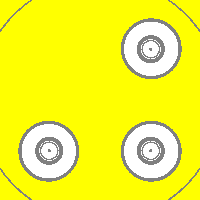

In [36]:
colors = {salt:'yellow', graphite:'black', inor: 'grey', helium: 'cyan', inconel: 'grey',
              bush: 'blue', concrete: 'brown', shield: 'red', insulation: 'green',
              sandwater: 'lightgreen', steel: 'grey'}
plot=openmc.Plot()
plot.basis = 'xy'
plot.width = (20,20)
plot.pixels = (200,200)
plot.origin = (0,0,220)
plot.color_by = 'material'
plot.colors = colors
openmc.plot_inline(plot)

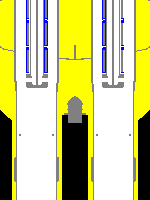

In [37]:
plot=openmc.Plot()
plot.basis = 'xz'
plot.width = (20,30)
plot.pixels = (150,200)
plot.origin = (0,-5,200)
plot.color_by = 'material'
plot.colors = colors
openmc.plot_inline(plot)

In [38]:
results=model.run()

[ca-ws:1462097] mca_base_component_repository_open: unable to open mca_accelerator_rocm: libamdhip64.so.6: cannot open shared object file: No such file or directory (ignored)
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%

We can now post-process the result file and plot the tallies:

In [39]:
with openmc.StatePoint(results) as sp:
    heating = sp.get_tally(name="heating").get_pandas_dataframe()["mean"].sum()*openmc.data.JOULE_PER_EV
    t = sp.get_tally(name="flux")
    flux = sp.get_tally(name="Mesh").get_slice(scores=['flux']).get_pandas_dataframe()["mean"]
    fission = sp.get_tally(name="Mesh").get_slice(scores=['fission']).get_pandas_dataframe()["mean"]
    absorption = sp.get_tally(name="Mesh").get_slice(scores=['absorption']).get_pandas_dataframe()["mean"]

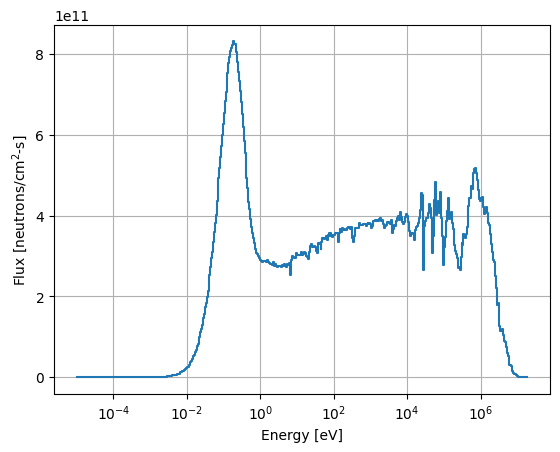

In [40]:
# Plot neutron flux spectrum
power = 8e6 #Thermal power in W
volume = 1.65e6 #Fuel salt volume in cm3

energy_filter = t.filters[0]
energies = energy_filter.bins[:, 0]
mean = t.mean.ravel()
uncertainty = t.get_values(value='std_dev').ravel()
fig, ax = plt.subplots()
ax.plot(energies, mean*power/heating/volume, drawstyle='steps-post')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel(r'Flux [neutrons/cm$^2$-s]')
ax.set_xscale('log')
ax.grid(True, which='both')
plt.show()

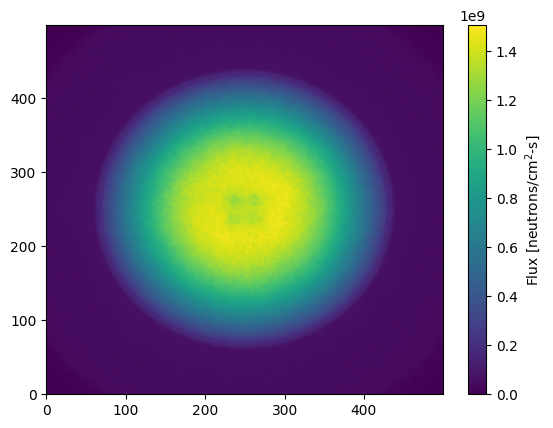

In [41]:

flux = flux.values.reshape(500,500)
fig, ax = plt.subplots()
pos = ax.imshow(flux*power/heating/volume, aspect='auto', origin='lower')
cbar = plt.colorbar(pos,ax=ax,label=r'Flux [neutrons/cm$^2$-s]')
plt.show()

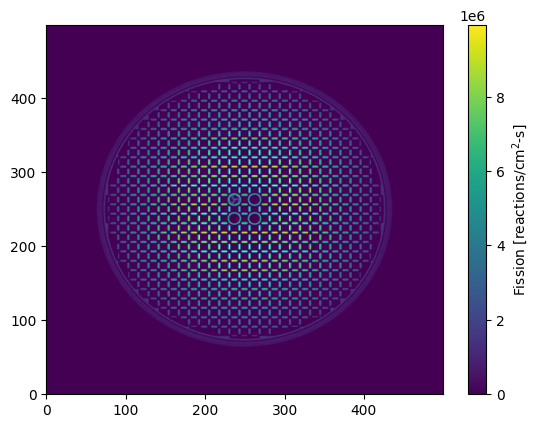

In [42]:

fission = fission.values.reshape(500,500)
fig, ax = plt.subplots()
pos = ax.imshow(fission*power/heating/volume, aspect='auto', origin='lower')
cbar = plt.colorbar(pos,ax=ax,label=r'Fission [reactions/cm$^2$-s]')
plt.show()

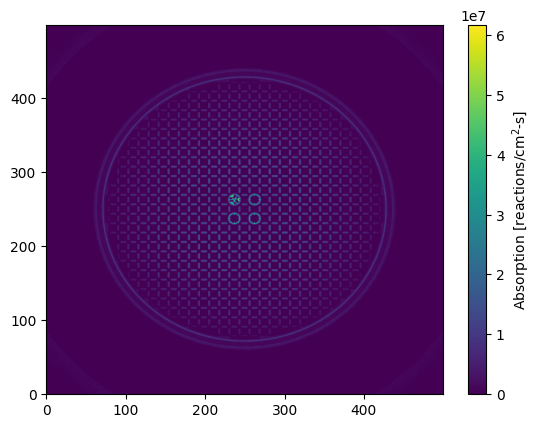

In [43]:

absorption = absorption.values.reshape(500,500)
fig, ax = plt.subplots()
pos = ax.imshow(absorption*power/heating/volume, aspect='auto', origin='lower')
cbar = plt.colorbar(pos,ax=ax,label=r'Absorption [reactions/cm$^2$-s]')
plt.show()